In [1]:
import pandas as pd
import numpy as np
import re

# from wordcloud import WordCloud, STOPWORDS
# from collections import Counter
#import scispacy
#import spacy

### Pre-Processing

In [2]:
#importing
df = pd.read_csv('df_diseases.csv')

In [3]:
df.head(2)

,Unnamed: 0,name,link,symptoms,causes,risk_factor,overview,treatment,medication,home_remedies
0,0,Acanthosis nigricans,https://www.mayoclinic.org/diseases-conditions...,"[""Skin changes are the only signs of acanthosi...",['Acanthosis nigricans has been associated wit...,"['Acanthosis nigricans risk factors include:',...",['Acanthosis nigricans is a skin condition tha...,"['In many situations, treating the underlying ...",NaN,NaN
1,1,Achalasia,https://www.mayoclinic.org/diseases-conditions...,NaN,NaN,NaN,"[""Achalasia is a rare disorder that makes it d...",['Achalasia treatment focuses on relaxing or f...,NaN,NaN


In [4]:
# dropping col's
df.drop([df.columns[0],df.columns[2]],axis=1,inplace=True)

In [5]:
# Filling NaN values with empty string
df.fillna('',inplace=True)

In [6]:
## some pre-processing
for i in range(len(df)):
    
    df.loc[i,'symptoms']=re.sub('[^A-Za-z0-9., ]+', '', df.loc[i,'symptoms'])
    df.loc[i,'causes']=re.sub('[^A-Za-z0-9., ]+', '', df.loc[i,'causes'])
    df.loc[i,'risk_factor']=re.sub('[^A-Za-z0-9., ]+', '', df.loc[i,'risk_factor'])
    
    df.loc[i,'overview']=re.sub('[^A-Za-z0-9., ]+', '', df.loc[i,'overview'])
    df.loc[i,'treatment']=re.sub('[^A-Za-z0-9., ]+', '', df.loc[i,'treatment'])
    df.loc[i,'medication']=re.sub('[^A-Za-z0-9., ]+', '', df.loc[i,'medication'])
    
    df.loc[i,'home_remedies']=re.sub('[^A-Za-z0-9., ]+', '', df.loc[i,'home_remedies'])

In [7]:
#some more preprocessing
df['name']=df['name'].str.lower()
df['symptoms']=df['symptoms'].str.lower()
df['causes']=df['causes'].str.lower()

df['risk_factor']=df['risk_factor'].str.lower()
df['overview']=df['overview'].str.lower()
df['treatment']=df['treatment'].str.lower()

df['medication']=df['medication'].str.lower()
df['home_remedies']=df['home_remedies'].str.lower()

### Creating Classes

In [8]:
#adding a new column named 'class' which will contain the category of the disease
df['class'] = -1

In [9]:
def create_classes(row):
    if((row['medication']=='') and (row['home_remedies']=='')):
        return 1
    elif((row['medication']!='') and (row['home_remedies']=='')):
        return 2
    elif((row['medication']!='') and (row['home_remedies']!='')):
        return 3
    elif((row['medication']=='') and (row['home_remedies']!='')):
        return 4

In [10]:
df['class'] = df.apply(create_classes, axis=1)

## Creating columns - 'organs', 'systems' and 'final_system' using dictionary

In [11]:
organ_dict={"muscular system": ["human skeleton", "joints", "ligaments", "muscular system", "tendons"],
 "digestive system": ["mouth", "teeth", "tongue", "salivary glands", "parotid glands", "submandibular glands", "sublingual glands", "pharynx", "esophagus", "stomach", "small intestine", "duodenum", "jejunum", "ileum", "large intestine", "liver", "gallbladder", "mesentery", "pancreas", "anal canal", "anus", "blood cells"],
 "respiratory system": ["nasal cavity", "pharynx", "larynx", "trachea", "bronchi", "lungs", "diaphragm"],
 "urinary system": ["kidneys", "ureter", "bladder", "urethra"],
 "reproductive system": ["testes", "epididymis", "vas deferens", "seminal vesicles", "prostate", "bulbourethral glands", "ovaries", "fallopian tubes", "uterus", "vagina", "vulva", "clitoris", "placenta", "penis", "scrotum"],
 "endocrine system": ["pituitary gland", "pineal gland", "thyroid gland", "parathyroid glands", "adrenal glands", "pancreas"],
 "circulatory system": ["heart", "patent foramen ovale", "arteries", "veins", "capillaries", "lymphatic vessel", "lymph node", "bone marrow", "thymus", "spleen", "gut-associated lymphoid tissue", "tonsils", "interstitium"],
 "nervous system": ["brain", "cerebrum", "cerebral hemispheres", "diencephalon", "the brainstem", "midbrain", "pons", "medulla oblongata", "cerebellum", "the spinal cord", "the ventricular system", "choroid plexus", "nerves", "cranial nerves", "spinal nerves", "ganglia", "enteric nervous system", "eye", "cornea", "iris", "ciliary body", "lens", "retina", "ear", "outer ear", "earlobe", "eardrum", "middle ear", "ossicles", "inner ear", "cochlea", "vestibule of the ear", "semicircular canals", "olfactory epithelium", "tongue", "taste buds"],
 "integumentary system": ["mammary glands", "skin", "subcutaneous tissue"]}

In [12]:
organ_keys = organ_dict.keys()

In [13]:
organ_keys

dict_keys(['muscular system', 'digestive system', 'respiratory system', 'urinary system', 'reproductive system', 'endocrine system', 'circulatory system', 'nervous system', 'integumentary system'])

In [14]:
df['organs'] = [[] for _ in range(len(df))]

In [15]:
for i in range(len(df)):
    
    s = df['symptoms'][i] + df['causes'][i] + df['risk_factor'][i] + df['overview'][i]
    s_tokens = s.split(' ')
    
    for value in organ_keys:
        val = organ_dict.get(value)
        for j in val:
            if(j in s_tokens):
                df.loc[i,'organs'].append(j)

In [16]:
df['systems'] = [[] for _ in range(len(df))]

In [17]:
key_list = list(organ_dict.keys()) 
val_list = list(organ_dict.values()) 

In [18]:
#val_list

In [19]:
#key_list

In [20]:
for i in range(len(df)):
    for val in df['organs'][i]:
        for k in range(len(val_list)):
            if(val in val_list[k]):
                df['systems'][i].append(key_list[k])

In [21]:
df.head(2)

,name,symptoms,causes,risk_factor,overview,treatment,medication,home_remedies,class,organs,systems
0,acanthosis nigricans,skin changes are the only signs of acanthosis ...,"acanthosis nigricans has been associated with,...","acanthosis nigricans risk factors include, obe...",acanthosis nigricans is a skin condition that ...,"in many situations, treating the underlying pr...",,,1,"[stomach, pancreas, pancreas, skin]","[digestive system, digestive system, endocrine..."
1,achalasia,,,,achalasia is a rare disorder that makes it dif...,achalasia treatment focuses on relaxing or for...,,,1,"[mouth, esophagus, stomach, nerves]","[digestive system, digestive system, digestive..."


### Manual Entries

In [22]:
#apurv

df.at[525,'organs']=['large intestine']
df.at[525,'systems']=['digestive system']

df.at[537,'organs']=['nose','eyes','throat','skin']
df.at[537,'systems']=['respiratory system']

df.at[539,'organs']=['blood']
df.at[539,'systems']=['circulatory system']

df.at[541,'organs']=['brain']
df.at[541,'systems']=['nervous system'] #psycological disorder

df.at[550,'organs']=['blood cells']
df.at[550,'systems']=['circulatory system'] #type of blood cancer

df.at[551,'organs']=['brain']
df.at[551,'systems']=['nervous system'] #psycological disorder

df.at[552,'organs']=['salivary gland'] #infection in salivary glands due to bacteria
df.at[552,'systems']=['digestive system']

df.at[554,'organs']=['muscles']
df.at[554,'systems']=['muscular system']

df.at[555,'organs']=['muscles']
df.at[555,'systems']=['muscular system']

df.at[558,'organs']=['muscles']
df.at[558,'systems']=['muscular system'] #bone marrow cancer

df.at[563,'organs']=['muscles']
df.at[563,'systems']=['muscular system'] #extreme pain in muscles due to various reasons

df.at[564,'organs']=['legs','arms']
df.at[564,'systems']=['muscular system'] #cancer that develops lump in legs or arms

df.at[566,'organs']=['nose','eyes','mouth']
df.at[566,'systems']=['respiratory system'] #cancer developing in nose

df.at[576,'organs']=['nerves'] #tumor nerves in peripheral nervous system
df.at[576,'systems']=['nervous system']

#the disease is classified as a disease of the respiratory sytem, but actually for nose fracture the 
#patient must be recommended to an orthopedic
df.at[593,'organs']=['nose']
df.at[593,'systems']=['respiratory system'] #nose fracture

df.at[594,'organs']=['fat']
df.at[594,'systems']=['integumentary system'] #obesity

df.at[603,'organs']=['brain']
df.at[603,'systems']=['nervous system'] #a type of brain tumor

df.at[609,'organs']=['joints']
df.at[609,'systems']=['muscular system']

df.at[614,'organs']=['joints','bones']
df.at[614,'systems']=['muscular system']

df.at[617,'organs']=['bone']
df.at[617,'systems']=['muscular system'] #bone cancer

df.at[623,'organs']=['thyroid gland']
df.at[623,'systems']=['endocrine system'] #cancer that occurs in the cells of thyroid gland

df.at[637,'organs']=['nerves']
df.at[637,'systems']=['nervous system'] #tumor in certain nerves

df.at[640,'organs']=['salivary glands']
df.at[640,'systems']=['digestive system'] #tumor in salivary glands

df.at[641,'organs']=['pumonary veins']
df.at[641,'systems']=['circulatory system'] #defect in pulmonary veins of the heart

df.at[643,'organs']=['brain']
df.at[643,'systems']=['nervous system'] #mental disorder

df.at[647,'organs']=['chest']
df.at[647,'systems']=['circulatory system'] 

df.at[649,'organs']=['hair','scalp']
df.at[649,'systems']=['integumentary system'] #tiny insects infect the scalp

df.at[670,'organs']=['foot']
df.at[670,'systems']=['muscular system'] 

df.at[679,'organs']=['brain','pineal gland']
df.at[679,'systems']=['nervous system'] #cancer develops in the pineal gland of brain

df.at[689,'organs']=['tissue']
df.at[689,'systems']=['muscular system']

df.at[694,'organs']=['lungs']
df.at[694,'systems']=['respiratory system']

df.at[700,'organs']=['muscles']
df.at[700,'systems']=['muscular system']

df.at[701,'organs']=['rectum','large intestine']
df.at[701,'systems']=['digestive system']

df.at[702,'organs']=['sinus','nose']
df.at[702,'systems']=['respiratory system']

df.at[704,'organs']=['popliteal artery','knee joint']
df.at[704,'systems']=['circulatory system']

df.at[706,'organs']=['knee','joint']
df.at[706,'systems']=['muscular system']

df.at[714,'organs']=['brain']
df.at[714,'systems']=['nervous system'] #psycological disorder

df.at[715,'organs']=['urine']
df.at[715,'systems']=['reproductive system']

df.at[716,'organs']=['thyroid gland']
df.at[716,'systems']=['endocrine system']

df.at[722,'organs']=['None']
df.at[722,'systems']=['Reproductive system']

df.at[728,'organs']=['brain']
df.at[728,'systems']=['nervous system'] #psycological disorder, addiction

df.at[735,'organs']=['adrenal gland']
df.at[735,'systems']=['endocrine system']

df.at[748,'organs']=['muscles']
df.at[748,'systems']=['muscular system']

df.at[750,'organs']=['large intestine']
df.at[750,'systems']=['digestive system'] #swelling of large intestine due to bacteria

df.at[757,'organs']=['pulmonary valve']
df.at[757,'systems']=['cirulatory system']

df.at[758,'organs']=['heart']
df.at[758,'systems']=['ciruclatory system']

df.at[769,'organs']=['body']
df.at[769,'systems']=['nervous system']

df.at[775,'organs']=['brain']
df.at[775,'systems']=['nervous system']

df.at[776,'organs']=['rectum']
df.at[776,'systems']=['reproductive system']

#end of apurv code

#Gargi

#df['name'][270] = 'fibrocystic breasts'
df.at[270,'organs']=['breasts']
df.at[270,'systems']=['reproductive system']

#df['name'][274] = 'fibrous dysplasia'
df.at[274,'organs']=['bone']
df.at[274,'systems']=['muscular system']

#df['name'][281] = 'foot fracture (see: broken foot)'
df.at[281,'organs']=['foot', 'bones']
df.at[281,'systems']=['muscular system']

#df['name'][282] = 'fracture, arm (see: broken arm)'
df.at[282,'organs']=['bone']
df.at[282,'systems']=['muscular system']

#df['name'][298] = 'gastrointestinal stromal tumor (gist)'
df.at[298,'organs']=['stomach', 'intestine']
df.at[298,'systems']=['digestive system']

#df['name'][300] = 'gender identity disorder (see: gender dysphoria)'
df.at[300,'organs']=['reproductive system']
df.at[300,'systems']=['reproductive system']

#df['name'][306] = 'giardia infection (giardiasis)'
df.at[306,'organs']=['stomach', 'intestine']
df.at[306,'systems']=['digestive system']

#df['name'][309] = 'glioblastoma'
df.at[309,'organs']=['brain', 'spine']
df.at[309,'systems']=['nervous system']

#df['name'][318] = 'growing pains'
df.at[318,'organs']=['legs','thighs','knees','calves']
df.at[318,'systems']=['muscular system']

#df['name'][325] = 'hamstring injury'
df.at[325,'organs']=['thigh']
df.at[325,'systems']=['muscular system']

#df['name'][326] = 'hand fracture (see: broken hand)'
df.at[326,'organs']=['hand']
df.at[326,'systems']=['muscular system']

#df['name'][330] = 'head and neck cancers'
df.at[330,'organs']=['mouth', 'sinuses', 'nose', 'throat']
df.at[330,'systems']=['respiratory system']

#df['name'][346] = 'hemifacial spasm
df.at[346,'organs']=['facial muscles']
df.at[346,'systems']=['muscular system']

#df['name'][353] = 'hepatocellular carcinoma'
df.at[353,'organs']=['liver']
df.at[353,'systems']=['digestive system']

#df['name'][361] = 'hip dysplasia'
df.at[361,'organs']=['hip']
df.at[361,'systems']=['muscular system']

#df['name'][363] = 'hip impingement'
df.at[363,'organs']=['hip']
df.at[363,'systems']=['muscular system']

#df['name'][364] = 'hip labral tear'
df.at[364,'organs']=['labrum', 'hip']
df.at[364,'systems']=['muscular system']

#df['name'][374] = 'hydronephrosis'
df.at[374,'organs']=['abdomen', 'kidney']
df.at[374,'systems']=['digestive system', 'urinary system']

#df['name'][386] = 'hypoglycemia, diabetic (see: diabetic hypoglycemia)'
df.at[386,'organs']=['low sugar']
df.at[386,'systems']=['digestive system']

#df['name'][395] = 'idiopathic hypersomnia'
df.at[395,'organs']=['neurological sleep disorder']
df.at[395,'systems']=['nervous system']

#df['name'][402] = 'ncomplete fracture (see: greenstick fractures)'
df.at[402,'organs']=['bones', 'forearm', 'legs']
df.at[402,'systems']=['muscular system']

#df['name'][408] = 'inflammatory bowel disease (ibd)'
df.at[408,'organs']=['digestive tract']
df.at[408,'systems']=['digestive system']

#df['name'][413] = 'ingrown toenails'
df.at[413,'organs']=['toenails', 'nails', 'finger']
df.at[413,'systems']=['integumentary system']

#df['name'][416] = 'intestinal obstruction'
df.at[416,'organs']=['abdomen', 'intestine']
df.at[416,'systems']=['digestive system']

#df['name'][418] = 'intraductal carcinoma (see: ductal carcinoma in situ (dcis))'
df.at[418,'organs']=['breasts']
df.at[418,'systems']=['reproductive system']

#df['name'][419] = 'intussusception'
df.at[419,'organs']=['intestine']
df.at[419,'systems']=['digestive system']

#df['name'][432] = 'Kaposi sarcoma'
df.at[432,'organs']=['skin', 'lymph nodes', 'mucous membranes lining the mouth', 'nose', 'throat']
df.at[432,'systems']=['integumentary system']

#df['name'][436] = 'kidney cysts'
df.at[436,'organs']=['kidney']
df.at[436,'systems']=['urinary system']

#df['name'][438] = 'klatskin tumor (see: hilar cholangiocarcinoma)'
df.at[438,'organs']=['hepatic duct', 'liver']
df.at[438,'systems']=['digestive system']

#df['name'][439] = 'klinefelter syndrome'
df.at[439,'organs']=['genetic', 'reproductive']
df.at[439,'systems']=['reproductive system']

#df['name'][450] = 'leg fracture (see: broken leg)'
df.at[450,'organs']=['leg', 'bone']
df.at[450,'systems']=['muscular system']

#df['name'][451] = 'legg-calve-perthes disease'
df.at[451,'organs']=['femur', 'hip', 'bone', 'thigh bone']
df.at[451,'systems']=['circulatory system']

#df['name'][452] = 'legionnaires disease'
df.at[452,'organs']=['heart' , 'lungs' ,'muscles']
df.at[452,'systems']=['muscular system','respiratory system', 'circulatory system']

#df['name'][453] = 'leiomyosarcoma'
df.at[453,'organs']=['stomach','bladder', 'intestine', 'uterus']
df.at[453,'systems']=['reproductive system','urinary system']

#df['name'][454] = 'leukemia, acute lymphocytic (see: acute lymphocytic leukemia)'
df.at[454,'organs']=['blood', 'bone marrow']
df.at[454,'systems']=['circulatory system']

#df['name'][455] = 'leukemia, acute myelogenous (see: acute myelogenous leukemia)'
df.at[455,'organs']=['blood', 'bone marrow']
df.at[455,'systems']=['circulatory system']

#df['name'][456] = 'leukemia, chronic lymphocytic (see: chronic lymphocytic leukemia)'
df.at[456,'organs']=['blood', 'bone marrow']
df.at[456,'systems']=['circulatory system']

#df['name'][457] = 'leukemia, chronic myelogenous (see: chronic myelogenous leukemia)'
df.at[457,'organs']=['blood', 'bone marrow']
df.at[457,'systems']=['circulatory system']

#df['name'][459] = 'leukemia, hairy cell (see: hairy cell leukemia)'
df.at[459,'organs']=['blood', 'bone marrow']
df.at[459,'systems']=['circulatory system']

#df['name'][469] = 'liposarcoma'
df.at[469,'organs']=['abdomen', 'thigh', 'knee', 'fat cells']
df.at[469,'systems']=['muscular system']

#df['name'][470] = 'listeriosis (see: listeria infection)'
df.at[470,'organs']=['brain', 'spinal cord', 'bloodstream']
df.at[470,'systems']=['nervous system','circulatory system']

#df['name'][476] = 'lobular carcinoma in situ (lcis)'
df.at[476,'organs']=['breasts']
df.at[476,'systems']=['reproductive system']

#df['name'][481] = 'low sex drive in women'
df.at[481,'organs']=['reproductive system']
df.at[481,'systems']=['reproductive system']

#df['name'][501] = 'mammary duct ectasia'
df.at[501,'organs']=['breasts']
df.at[501,'systems']=['reproductive system']

#df['name'][502] = 'manic-depressive illness (see: bipolar disorder)'
df.at[502,'organs']=['nervous system']
df.at[502,'systems']=['nervous system']

#df['name'][507] = 'mcad deficiency'
df.at[507,'organs']=['skeletal- and heart muscle', 'liver', 'brain']
df.at[507,'systems']=['circulatory system', 'digestive system', 'nervous system']

#df['name'][509] = 'medulloblastoma'
df.at[509,'organs']=['cerebellum', 'brain']
df.at[509,'systems']=['nervous system']

#df['name'][523] = 'metatarsalgia'
df.at[523,'organs']=['foot']
df.at[523,'systems']=['muscular system']

#end of gargi code
                     

#pradeumna

df.at[779,'organs']=['anus']
df.at[779,'systems']=['digestive system']

df.at[791,'organs']=['human skeleton']
df.at[791,'systems']=['muscular system']

df.at[808,'organs']=['brain']
df.at[808,'systems']=['nervous system']

df.at[810,'organs']=['stomach']
df.at[810,'systems']=['digestive system']

df.at[811,'organs']=['tendons']
df.at[811,'systems']=['muscular system']

df.at[815,'organs']=['joints']
df.at[815,'systems']=['muscular system']

df.at[823,'organs']=['human skeleton']
df.at[823,'systems']=['nervous system']

df.at[826,'organs']=['brain']
df.at[826,'systems']=['nervous system']

df.at[827,'organs']=['brain']
df.at[827,'systems']=['nervous system']

df.at[831,'organs']=['brain']
df.at[831,'systems']=['nervous system']

df.at[841,'organs']=['skin']
df.at[841,'systems']=['integumentary system']

df.at[848,'organs']=['brain']
df.at[848,'systems']=['nervous system']

df.at[849,'organs']=['brain']
df.at[849,'systems']=['nervous system']

df.at[853,'organs']=['brain']
df.at[853,'systems']=['nervous system']

df.at[859,'organs']=['lungs']
df.at[859,'systems']=['respiratory system']

df.at[867,'organs']=['large intestine']
df.at[867,'systems']=['digestive system']

df.at[876,'organs']=['brain']
df.at[876,'systems']=['nervous system']

df.at[889,'organs']=['brain']
df.at[889,'systems']=['nervous system']

df.at[905,'organs']=['muscular']
df.at[905,'systems']=['muscular system']

df.at[928,'organs']=['vagina']
df.at[928,'systems']=['reproductive system']

df.at[949,'organs']=['muscular system']
df.at[949,'systems']=['muscular system']

df.at[962,'organs']=['brain']
df.at[962,'systems']=['nervous system']

df.at[969,'organs']=['skin']
df.at[969,'systems']=['integumentary system']

df.at[977,'organs']=['joints']
df.at[977,'systems']=['muscular system']

df.at[982,'organs']=['bone marrow']
df.at[982,'systems']=['circulatory system']

df.at[995,'organs']=['muscular system']
df.at[995,'systems']=['muscular system']

df.at[996,'organs']=['joints']
df.at[996,'systems']=['muscular system']

df.at[1006,'organs']=['kidneys']
df.at[1006,'systems']=['urinary system']

df.at[1009,'organs']=['skin']
df.at[1009,'systems']=['integumentary system']

df.at[1014,'organs']=['bone marrow']
df.at[1014,'systems']=['circulatory system']

df.at[1015,'organs']=['blood']
df.at[1015,'systems']=['circulatory system']

df.at[1022,'organs']=['thyroid gland']
df.at[1022,'systems']=['endocrine system']

df.at[1024,'organs']=['thyroid gland']
df.at[1024,'systems']=['endocrine system']

df.at[1029,'organs']=['human skeleton']
df.at[1029,'systems']=['muscular system']

df.at[1042,'organs']=['human skeleton']
df.at[1042,'systems']=['muscular system']

df.at[1045,'organs']=['heart']
df.at[1045,'systems']=['circulatory system']

df.at[1057,'organs']=['brain']
df.at[1057,'systems']=['nervous system']

df.at[1060,'organs']=['vagina']
df.at[1060,'systems']=['reproductive system']

df.at[1061,'organs']=['brain']
df.at[1061,'systems']=['nervous system']

df.at[1080,'organs']=['intestines']
df.at[1080,'systems']=['digestive system']

df.at[1083,'organs']=['anus']
df.at[1083,'systems']=['digestive system']

df.at[1086,'organs']=['muscular system']
df.at[1086,'systems']=['muscular system']

df.at[1124,'organs']=['trachea']
df.at[1124,'systems']=['respiratory system']

df.at[1143,'organs']=['blood']
df.at[1143,'systems']=['circulatory system']

df.at[1147,'organs']=['blood']
df.at[1147,'systems']=['circulatory system']

df.at[1159,'organs']=['blood']
df.at[1159,'systems']=['circulatory system']

df.at[1167,'organs']=['human skeleton']
df.at[1167,'systems']=['muscular system']

df.at[1177,'organs']=['muscular system']
df.at[1177,'systems']=['muscular system']

#end of praduemna code
                     
#prathamesh
df.at[5,'organs']=['brain']
df.at[5,'systems']=['nervous system']

df.at[7,'organs']=['adrenal gland']
df.at[7,'systems']=['endocrine system']

df.at[17,'organs']=['jaw']
df.at[17,'systems']=['muscular system']

df.at[32,'organs']=['uterus','vagina']
df.at[32,'systems']=['reproductive system']

df.at[41,'organs']=['appendix']  ###which system??
df.at[41,'systems']=['digestive system']

df.at[50,'organs']=['lungs']
df.at[50,'systems']=['respiratory system']

df.at[52,'organs']=['brain']
df.at[52,'systems']=['nervous system']

df.at[56,'organs']=['heart']
df.at[56,'systems']=['circulatory system']

df.at[57,'organs']=['brain']
df.at[57,'systems']=['nervous system']

df.at[58,'organs']=['brain']
df.at[58,'systems']=['nervous system']

df.at[60,'organs']=['breasts']#add breast as an organ of the reproductive system in the val_list
df.at[60,'systems']=['reproductive system']

df.at[63,'organs']=['heart']
df.at[63,'systems']=['circulatory system']

df.at[64,'organs']=['skin']
df.at[64,'systems']=['integumentary system']

df.at[72,'organs']=['adrenal gland']
df.at[72,'systems']=['endocrine system']

df.at[74,'organs']=['heart']
df.at[74,'systems']=['circulatory system']

df.at[78,'organs']=['stomach','small intestine','large intestine']
df.at[78,'systems']=['digestive system']

df.at[86,'organs']=['breats']#add breast as an organ of the reproductive system in the val_list
df.at[86,'systems']=['reproductive system']

df.at[87,'organs']=['ligament','joints']
df.at[87,'systems']=['muscular system']

df.at[88,'organs']=['ligament']
df.at[88,'systems']=['muscular system']

df.at[89,'organs']=['human skeleton','joint']
df.at[89,'systems']=['muscular system']

df.at[91,'organs']=['lungs']
df.at[91,'systems']=['respiratory system']

df.at[124,'organs']=['brain']
df.at[124,'systems']=['nervous system']

df.at[130,'organs']=['human skeleton','joints']
df.at[130,'systems']=['muscular system']

df.at[131,'organs']=['brain','pinal nerves']
df.at[131,'systems']=['nervous system']

df.at[132,'organs']=['brain']
df.at[132,'systems']=['nervous system']

df.at[133,'organs']=['brain']
df.at[133,'systems']=['nervous system']

df.at[144,'organs']=['large intestine']
df.at[144,'systems']=['digestive system']

df.at[147,'organs']=['lungs']
df.at[147,'systems']=['respiratory system']

df.at[148,'organs']=['muscular system']
df.at[148,'systems']=['muscular system']

df.at[152,'organs']=['heart']
df.at[152,'systems']=['circulatory system']

df.at[153,'organs']=['muscular system']
df.at[153,'systems']=['muscular system']

df.at[165,'organs']=['brain']
df.at[165,'systems']=['nervous system']

df.at[172,'organs']=['skin']
df.at[172,'systems']=['integumentary system']

df.at[173,'organs']=['UNKNOWN']#vomiting vala problem
df.at[173,'systems']=['digestive system']

df.at[185,'organs']=['brain']
df.at[185,'systems']=['nervous system']

df.at[190,'organs']=['muscular system']
df.at[190,'systems']=['muscular system']

df.at[191,'organs']=['ligament']
df.at[191,'systems']=['muscular system']

df.at[192,'organs']=['skin']
df.at[192,'systems']=['integumentary system']

df.at[200,'organs']=['UNKNOWN']#watery stools due to indigestion
df.at[200,'systems']=['digestive system']

df.at[206,'organs']=['stomach','large intestine']
df.at[206,'systems']=['digestive system']

df.at[208,'organs']=['heart']
df.at[208,'systems']=['circulatory system']

df.at[212,'organs']=['brain']#sleep deprivation
df.at[212,'systems']=['nervous system']

df.at[213,'organs']=['stomach','small intestine','pancreas'] 
df.at[213,'systems']=['digestive system']

df.at[225,'organs']=['brain']
df.at[225,'systems']=['nervous system']

df.at[236,'organs']=['brain']
df.at[236,'systems']=['nervous system']

df.at[247,'organs']=['brain']
df.at[247,'systems']=['nervous system']

df.at[251,'organs']=['bones']
df.at[251,'systems']=['muscular system']

df.at[255,'organs']=['muscular system','human skeleton']
df.at[255,'systems']=['muscular system']

df.at[256,'organs']=['skin']
df.at[256,'systems']=['integumentary system']

df.at[270,'organs']=['breasts']
df.at[270,'systems']=['reproductive system']

#end of prathamesh code

df.at[171,'organs']=['skin']
df.at[171,'systems']=['integumentary system']

df.at[390,'organs']=['parathyroid gland']
df.at[390,'systems']=['endocrine system']

df.at[987,'organs']=['stomach','intestine']
df.at[987,'systems']=['digestive system']

### Finding the final system

In [23]:
from statistics import mode, StatisticsError

In [24]:
df['final_system'] = [[] for _ in range(len(df))]

<font color='red'>**We discussed the cases where the value is "no system". Ideally based on the exercise there should not be any such cases, did you guys checked it?**</font>

<font color='blue'>**There are no cases where there is "no system". We forgot to erase that part of the code from below cell.**</font>

In [25]:
for i in range(len(df)):
    
#     if(len(df.loc[i,'systems'])==0):
#         df.loc[i,'final_system']='no system'
#         continue
    try:
        var=mode(df['systems'][i])
        df.loc[i,'final_system']=var
    except StatisticsError:
        df.loc[i,'final_system']='ambigious'

In [26]:
df.head(2)

,name,symptoms,causes,risk_factor,overview,treatment,medication,home_remedies,class,organs,systems,final_system
0,acanthosis nigricans,skin changes are the only signs of acanthosis ...,"acanthosis nigricans has been associated with,...","acanthosis nigricans risk factors include, obe...",acanthosis nigricans is a skin condition that ...,"in many situations, treating the underlying pr...",,,1,"[stomach, pancreas, pancreas, skin]","[digestive system, digestive system, endocrine...",digestive system
1,achalasia,,,,achalasia is a rare disorder that makes it dif...,achalasia treatment focuses on relaxing or for...,,,1,"[mouth, esophagus, stomach, nerves]","[digestive system, digestive system, digestive...",digestive system


To check if there is any empty entry in 'systems' column

In [27]:
temp=[]

for i in range(len(df)):
    if(len(df.loc[i,'systems'])==0):
        temp.append(True)
    else:
        temp.append(False)

In [28]:
df[temp].count()

name             0
symptoms         0
causes           0
risk_factor      0
overview         0
treatment        0
medication       0
home_remedies    0
class            0
organs           0
systems          0
final_system     0
dtype: int64

### Creating a column 'input' having concatenated entries of 'symptoms'+'causes'+'risk_factor'+'overview'

In [29]:
test_df = df.copy()

In [30]:
test_df['input']=''

In [31]:
for i in range(len(test_df)):
    test_df.loc[i,'input']=test_df.loc[i,'symptoms']+test_df.loc[i,'causes']+test_df.loc[i,'risk_factor']+test_df.loc[i,'overview']

In [32]:
test_df.head(2)

,name,symptoms,causes,risk_factor,overview,treatment,medication,home_remedies,class,organs,systems,final_system,input
0,acanthosis nigricans,skin changes are the only signs of acanthosis ...,"acanthosis nigricans has been associated with,...","acanthosis nigricans risk factors include, obe...",acanthosis nigricans is a skin condition that ...,"in many situations, treating the underlying pr...",,,1,"[stomach, pancreas, pancreas, skin]","[digestive system, digestive system, endocrine...",digestive system,skin changes are the only signs of acanthosis ...
1,achalasia,,,,achalasia is a rare disorder that makes it dif...,achalasia treatment focuses on relaxing or for...,,,1,"[mouth, esophagus, stomach, nerves]","[digestive system, digestive system, digestive...",digestive system,achalasia is a rare disorder that makes it dif...


## Training The Dataset

#### Some preprocessing before building the model

Following are the counts of each class in the entire dataset:

In [34]:
test_df['class'].value_counts()

1    509
4    379
3    191
2    103
Name: class, dtype: int64

In [35]:
# from sklearn.model_selection import train_test_split

In [36]:
# X_train,X_test,Y_train,Y_test=train_test_split(test_df['input'],test_df['class'],test_size=0.2,random_state=1)

In [37]:
x=test_df['input'].values

In [38]:
y=test_df['class'].values

### Splitting the data into train and test sets using Stratified sampling

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

<font color='blue'>**A split of 80:20 is good. You can also try to increase the split ratio so that the model has more data to train on. One experiment could be to try with a ratio of 90:10**</font>

In [40]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=1)

In [41]:
for train_index,test_index in sss.split(x,y):
    X_train,X_test=x[train_index],x[test_index]
    Y_train,Y_test=y[train_index],y[test_index]

The next 3 cells are used to know the count of each class after stratified split

In [42]:
# class1_count=0
# class2_count=0
# class3_count=0
# class4_count=0

In [43]:
# for i in range(len(Y_train)):
#     if(Y_train[i]==1):
#         class1_count+=1
#     elif(Y_train[i]==2):
#         class2_count+=1
#     elif(Y_train[i]==3):
#         class3_count+=1
#     else:
#         class4_count+=1

In [44]:
# print('class1_count: ',class1_count)
# print('class2_count: ',class2_count)
# print('class3_count: ',class3_count)
# print('class4_count: ',class4_count)

### Making string data suitable for modelling using TFIDF

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
count_vect = CountVectorizer().fit(X_train)

In [47]:
X_train_counts = count_vect.transform(X_train)
X_train_counts.shape

(945, 16439)

In [48]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(X_train_counts)

In [49]:
X_train_tfidf = tfidf_transformer.transform(X_train_counts)
X_train_tfidf.shape

(945, 16439)

In [50]:
X_test_counts = count_vect.transform(X_test)
X_test_counts.shape

(237, 16439)

In [51]:
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_tfidf.shape

(237, 16439)

## Modelling the data using various clasification models

## Using Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logistic_clf=LogisticRegression(C=0.01,solver='liblinear',multi_class='auto').fit(X_train_tfidf,Y_train)

In [54]:
logistic_predicted=logistic_clf.predict(X_test_tfidf)

In [55]:
# # Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# # The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# # We will be using the 'text_clf' going forward.
# from sklearn.pipeline import Pipeline

# text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('classifier', LogisticRegression(C=0.01,solver='liblinear',multi_class='auto'))])

# text_clf = text_clf.fit(X_train, Y_train)

In [56]:
# predicted = text_clf.predict(X_test)

In [57]:
from sklearn import metrics

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
logistic_cm=confusion_matrix(Y_test,logistic_predicted)

In [60]:
logistic_cm

array([[102,   0,   0,   0],
       [ 21,   0,   0,   0],
       [ 38,   0,   0,   0],
       [ 76,   0,   0,   0]], dtype=int64)

In [61]:
from sklearn.metrics import jaccard_score

In [62]:
# jaccard_score?

In [63]:
jaccard_score(Y_test,logistic_predicted,average='weighted')

0.18522672648614005

In [64]:
from sklearn.metrics import classification_report

In [65]:
logistic_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [66]:
print(classification_report(Y_test, logistic_predicted,labels=np.unique(logistic_predicted)))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60       102

   micro avg       0.43      1.00      0.60       102
   macro avg       0.43      1.00      0.60       102
weighted avg       0.43      1.00      0.60       102



In [67]:
logistic_accuracy=metrics.accuracy_score(Y_test,logistic_predicted)
logistic_accuracy

0.43037974683544306

In [68]:
metrics.f1_score(Y_test,logistic_predicted,average='weighted',labels=np.unique(logistic_predicted))

0.6017699115044248

## Using Naive Bayes

In [69]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
naive_bayes_clf = MultinomialNB().fit(X_train_tfidf, Y_train)

In [71]:
naive_bayes_predicted=naive_bayes_clf.predict(X_test_tfidf)

In [72]:
naive_bayes_predicted

array([4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1,
       4, 4, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4,
       1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1], dtype=int64)

In [73]:
jaccard_score(Y_test,naive_bayes_predicted,average='weighted')

0.24634530963644885

In [74]:
print(classification_report(Y_test, naive_bayes_predicted,labels=np.unique(naive_bayes_predicted)))

              precision    recall  f1-score   support

           1       0.47      0.90      0.62       102
           4       0.42      0.22      0.29        76

   micro avg       0.46      0.61      0.53       178
   macro avg       0.45      0.56      0.45       178
weighted avg       0.45      0.61      0.48       178



In [75]:
naive_bayes_cm=confusion_matrix(Y_test,naive_bayes_predicted)

In [76]:
naive_bayes_cm

array([[92,  0,  0, 10],
       [18,  0,  0,  3],
       [28,  0,  0, 10],
       [59,  0,  0, 17]], dtype=int64)

In [77]:
naive_bayes_accuracy=metrics.accuracy_score(Y_test,naive_bayes_predicted)
naive_bayes_accuracy

0.459915611814346

In [78]:
metrics.f1_score(Y_test,naive_bayes_predicted,average='weighted',labels=np.unique(naive_bayes_predicted))

0.47778142043930505

## Using K-Nearest Neighbors

In [79]:
from sklearn.neighbors import KNeighborsClassifier

### First we need to check which value of k will give best results

In [80]:
k_max=10

mean_acc=np.zeros((k_max-1))

for i in range(1,k_max):
    knn_clf_test=KNeighborsClassifier(n_neighbors=i).fit(X_train_tfidf,Y_train)
    knn_test_predicted=knn_clf_test.predict(X_test_tfidf)
    
    mean_acc[i-1]=metrics.accuracy_score(Y_test,knn_test_predicted)
    
mean_acc

array([0.44725738, 0.45147679, 0.46835443, 0.4556962 , 0.43881857,
       0.43459916, 0.43459916, 0.43459916, 0.43881857])

In [81]:
import matplotlib.pyplot as plt

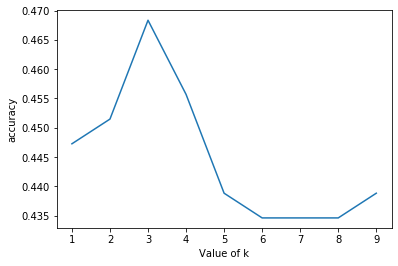

In [82]:
plt.figure()
plt.plot(np.arange(1,10),mean_acc)
plt.xlabel('Value of k')
plt.ylabel('accuracy')
plt.show()

### Using k=4 as per results from above graph

In [83]:
neighbors=4

In [84]:
knn_clf=KNeighborsClassifier(n_neighbors=neighbors).fit(X_train_tfidf,Y_train)

In [85]:
knn_predicted=knn_clf.predict(X_test_tfidf)

In [86]:
knn_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 3, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [87]:
jaccard_score(Y_test,knn_predicted,average='weighted')

0.23490737156613883

In [88]:
print(classification_report(Y_test, knn_predicted,labels=np.unique(knn_predicted)))

              precision    recall  f1-score   support

           1       0.45      0.94      0.61       102
           2       0.00      0.00      0.00        21
           3       0.40      0.11      0.17        38
           4       0.62      0.11      0.18        76

    accuracy                           0.46       237
   macro avg       0.37      0.29      0.24       237
weighted avg       0.46      0.46      0.35       237



In [89]:
knn_cm=confusion_matrix(Y_test,knn_predicted)
knn_cm

array([[96,  0,  3,  3],
       [20,  0,  1,  0],
       [31,  1,  4,  2],
       [66,  0,  2,  8]], dtype=int64)

In [90]:
knn_accuracy=metrics.accuracy_score(Y_test,knn_predicted)
knn_accuracy

0.45569620253164556

In [91]:
metrics.f1_score(Y_test,knn_predicted,average='weighted',labels=np.unique(knn_predicted))

0.346699085456019

## Using Support Vector Machines

In [92]:
from sklearn import svm

In [93]:
svm_clf= svm.SVC(kernel='rbf',gamma='auto').fit(X_train_tfidf,Y_train)

In [94]:
svm_predicted=svm_clf.predict(X_test_tfidf)

In [95]:
svm_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [96]:
jaccard_score(Y_test,svm_predicted,average='weighted')

0.18522672648614005

In [97]:
print(classification_report(Y_test, svm_predicted,labels=np.unique(svm_predicted)))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60       102

   micro avg       0.43      1.00      0.60       102
   macro avg       0.43      1.00      0.60       102
weighted avg       0.43      1.00      0.60       102



In [98]:
svm_cm=confusion_matrix(Y_test,svm_predicted)
svm_cm

array([[102,   0,   0,   0],
       [ 21,   0,   0,   0],
       [ 38,   0,   0,   0],
       [ 76,   0,   0,   0]], dtype=int64)

In [99]:
svm_accuracy=metrics.accuracy_score(Y_test,svm_predicted)
svm_accuracy

0.43037974683544306

In [100]:
metrics.f1_score(Y_test,svm_predicted,average='weighted',labels=np.unique(svm_predicted))

0.6017699115044248

## Decision Trees

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
decision_tree_clf=DecisionTreeClassifier(criterion='entropy',max_depth=4).fit(X_train_tfidf,Y_train)

In [103]:
decision_tree_predicted=decision_tree_clf.predict(X_test_tfidf)

In [104]:
decision_tree_predicted

array([4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       3, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1,
       1, 4, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 4, 4, 1, 4, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1], dtype=int64)

In [105]:
jaccard_score(Y_test,decision_tree_predicted,average='weighted')

0.2586470355221536

In [106]:
print(classification_report(Y_test, decision_tree_predicted,labels=np.unique(decision_tree_predicted)))

              precision    recall  f1-score   support

           1       0.48      0.88      0.62       102
           2       0.00      0.00      0.00        21
           3       0.33      0.05      0.09        38
           4       0.44      0.24      0.31        76

    accuracy                           0.46       237
   macro avg       0.31      0.29      0.25       237
weighted avg       0.40      0.46      0.38       237



In [107]:
decision_tree_cm=confusion_matrix(Y_test,decision_tree_predicted)
decision_tree_cm

array([[90,  1,  1, 10],
       [18,  0,  0,  3],
       [26,  0,  2, 10],
       [55,  0,  3, 18]], dtype=int64)

In [108]:
decision_tree_accuracy=metrics.accuracy_score(Y_test,decision_tree_predicted)
decision_tree_accuracy

0.4641350210970464

In [109]:
metrics.f1_score(Y_test,decision_tree_predicted,average='weighted',labels=np.unique(decision_tree_predicted))

0.3794596807777024

## Random Forest Classification

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
random_forest_clf = RandomForestClassifier(n_estimators=1000, 
                               bootstrap = True,
                               max_features = 'sqrt').fit(X_train_tfidf,Y_train)

In [112]:
random_forest_predicted=random_forest_clf.predict(X_test_tfidf)

In [113]:
random_forest_predicted

array([4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 1,
       3, 1, 4, 4, 1, 1, 4, 1, 4, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 4,
       1, 4, 4, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 4, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 4, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 4, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 4, 4, 1, 4, 1, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 4, 1, 1, 1, 4, 4, 4, 4, 4, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1,
       1, 1, 4, 1, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 1, 4, 4, 4, 1, 1,
       1, 4, 1, 1, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1,
       3, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 3, 1, 4, 4, 1, 1, 3,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 4, 1, 1], dtype=int64)

In [114]:
jaccard_score(Y_test,random_forest_predicted,average='weighted')

0.36217066075591764

In [115]:
print(classification_report(Y_test,random_forest_predicted,labels=np.unique(random_forest_predicted) ))

              precision    recall  f1-score   support

           1       0.59      0.85      0.70       102
           3       0.83      0.13      0.23        38
           4       0.49      0.54      0.51        76

   micro avg       0.56      0.62      0.59       216
   macro avg       0.64      0.51      0.48       216
weighted avg       0.60      0.62      0.55       216



In [116]:
random_forest_cm=confusion_matrix(Y_test,random_forest_predicted)
random_forest_cm

array([[87,  0,  0, 15],
       [12,  0,  1,  8],
       [13,  0,  5, 20],
       [35,  0,  0, 41]], dtype=int64)

In [117]:
random_forest_accuracy=metrics.accuracy_score(Y_test,random_forest_predicted)
random_forest_accuracy

0.5611814345991561

In [118]:
metrics.f1_score(Y_test,random_forest_predicted,average='weighted',labels=np.unique(random_forest_predicted))

0.5502938521763823

## Notes

-  The performance metrics for the algorithms are OK with Random Forest outperforming the other algorithms.
    - The **reason for this subpar performance** is **class imbalance**. The distribution of data points in each of the four classes (1 - 4) is not balanced, which creates a biased scenario to the classes which have a higher number of samples.
    - Possible solution to mititgate this is to get more training data.

<hr>

-  There are some algorithms that might perform slightly better on this kind of dataset. Take a look at [Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) and see how it performs. I am not sure if it's applicable to multiclass scenario but you can try it out.

### Isolation Forest

In [119]:
from sklearn.ensemble import IsolationForest

In [120]:
isolation_clf=IsolationForest(random_state=1,behaviour="new",contamination='auto').fit(X_train_tfidf)

In [121]:
isolation_predicted=isolation_clf.predict(X_test_tfidf)
isolation_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [122]:
jaccard_score(Y_test,isolation_predicted,average='weighted')

0.18522672648614005

In [123]:
print(classification_report(Y_test,isolation_predicted,labels=np.unique(isolation_predicted)))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60       102

   micro avg       0.43      1.00      0.60       102
   macro avg       0.43      1.00      0.60       102
weighted avg       0.43      1.00      0.60       102



In [124]:
isolation_accuracy=metrics.accuracy_score(Y_test,isolation_predicted)
isolation_accuracy

0.43037974683544306

In [125]:
isolation_cm=confusion_matrix(Y_test,isolation_predicted)
isolation_cm

array([[102,   0,   0,   0],
       [ 21,   0,   0,   0],
       [ 38,   0,   0,   0],
       [ 76,   0,   0,   0]], dtype=int64)

In [126]:
metrics.f1_score(Y_test,isolation_predicted,average='weighted',labels=np.unique(isolation_predicted))

0.6017699115044248

### Some data visualization

## Accuracy Graph

In [127]:
accuracy_list=[logistic_accuracy,isolation_accuracy,naive_bayes_accuracy,knn_accuracy,svm_accuracy,decision_tree_accuracy,random_forest_accuracy]

In [128]:
%matplotlib notebook

In [129]:
accuracy_x_labels=['logistic','isolation','naive_bayes','knn','svm','decision_tree','random_forest']

<IPython.core.display.Javascript object>


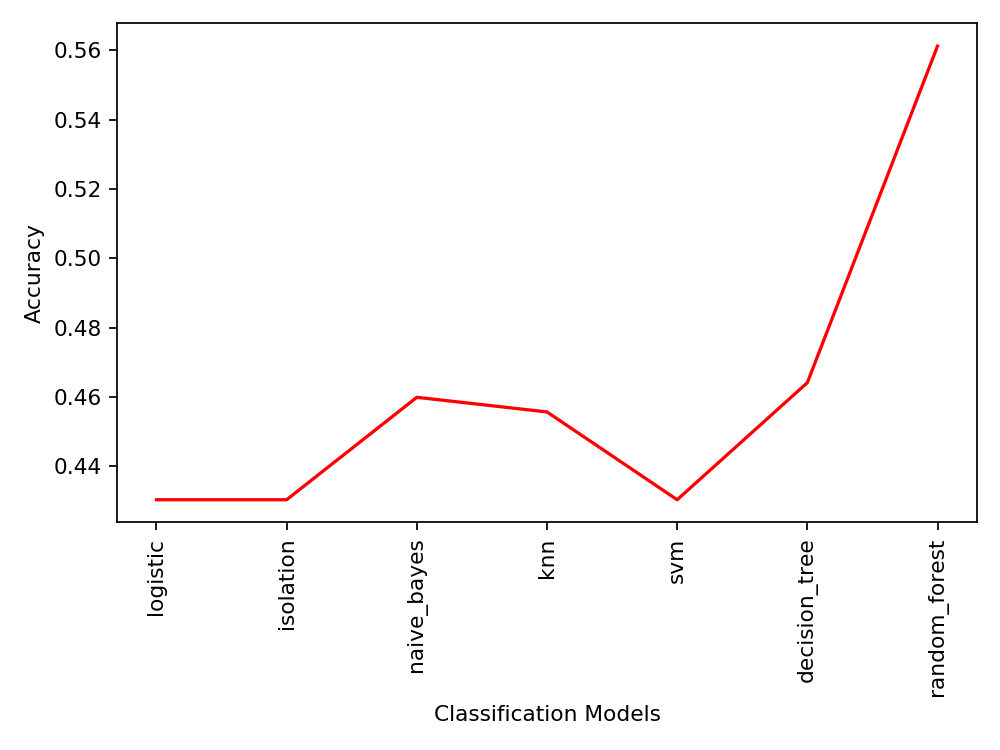

In [130]:
plt.figure()
plt.plot(accuracy_x_labels,accuracy_list,'-r')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

## F1 Score Graph

In [131]:
f1_random_forest=metrics.f1_score(Y_test,random_forest_predicted,average='weighted',labels=np.unique(random_forest_predicted))
f1_decision_tree=metrics.f1_score(Y_test,decision_tree_predicted,average='weighted',labels=np.unique(decision_tree_predicted))
f1_svm=metrics.f1_score(Y_test,svm_predicted,average='weighted',labels=np.unique(svm_predicted))
f1_knn=metrics.f1_score(Y_test,knn_predicted,average='weighted',labels=np.unique(knn_predicted))
f1_naive_bayes=metrics.f1_score(Y_test,naive_bayes_predicted,average='weighted',labels=np.unique(naive_bayes_predicted))
f1_logistic=metrics.f1_score(Y_test,logistic_predicted,average='weighted',labels=np.unique(logistic_predicted))
f1_isolation=metrics.f1_score(Y_test,isolation_predicted,average='weighted',labels=np.unique(isolation_predicted))

In [132]:
f1_score_list=[f1_logistic,f1_isolation,f1_naive_bayes,f1_knn,f1_svm,f1_decision_tree,f1_random_forest]

In [133]:
f1_score_x_labels=['logistic','isolation','naive_bayes','knn','svm','decision_tree','random_forest']

<IPython.core.display.Javascript object>


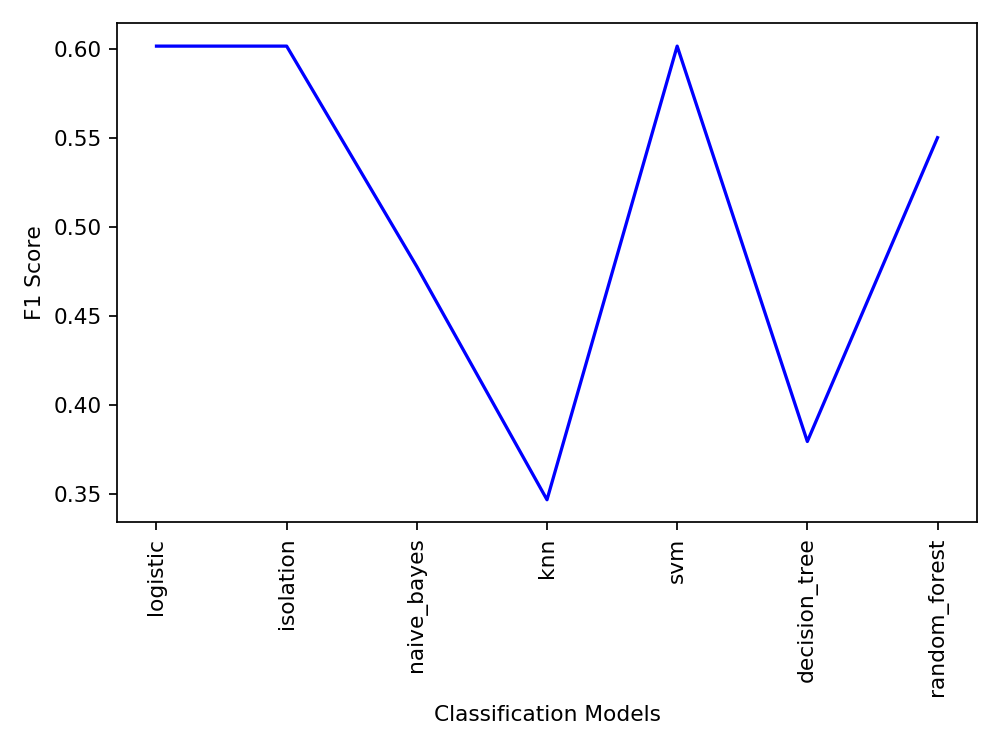

In [134]:
plt.figure()
plt.plot(f1_score_x_labels,f1_score_list,'-b')
plt.xlabel('Classification Models')
plt.ylabel('F1 Score')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

### Creating a report

In [135]:
data={'model':['Logistic','Isolation','Naive Bayes','KNN','SVM','Decision Tree','Random Forest'],
     'Accuracy':accuracy_list,'F1 Score':f1_score_list}

In [136]:
report_df=pd.DataFrame(data)

In [137]:
report_df.set_index('model',inplace=True)

In [144]:
report_df.sort_values(by='Accuracy',axis=0,ascending=False,inplace=True)

In [145]:
report_df

,Accuracy,F1 Score
model,,
Random Forest,0.561181,0.550294
Decision Tree,0.464135,0.379460
Naive Bayes,0.459916,0.477781
KNN,0.455696,0.346699
Logistic,0.430380,0.601770
Isolation,0.430380,0.601770
SVM,0.430380,0.601770
